<a href="https://colab.research.google.com/github/deepakreddyn/hotel-reservation/blob/main/hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_recall_fscore_support,fbeta_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
dataset = pd.read_csv('/content/Hotel Reservations (1).csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
onehot=pd.get_dummies(dataset['type_of_meal_plan'])
onehot
df_encoded=pd.concat([dataset,onehot],axis=1)

In [ ]:
onehot=pd.get_dummies(dataset['market_segment_type'])

onehot
df_encoded=pd.concat([dataset,onehot],axis=1)

In [ ]:
newdataset=df_encoded.drop(['type_of_meal_plan','room_type_reserved','Booking_ID','market_segment_type'],axis=1)
newdataset['arrival_date'] = pd.to_numeric(newdataset['arrival_date'], errors='coerce')
newdataset.dropna(subset=['arrival_date'], inplace=True)
newdataset['arrival_date']=newdataset['arrival_date'].astype(float)

In [ ]:
newdataset.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Aviation,Complementary,Corporate,Offline,Online
0,2,0,1,2,0,224,2017,10,2.0,0,0,0,65.00,0,Not_Canceled,False,False,False,True,False
1,2,0,2,3,0,5,2018,11,6.0,0,0,0,106.68,1,Not_Canceled,False,False,False,False,True
2,1,0,2,1,0,1,2018,2,28.0,0,0,0,60.00,0,Canceled,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20.0,0,0,0,100.00,0,Canceled,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11.0,0,0,0,94.50,0,Canceled,False,False,False,False,True


In [ ]:
newdataset=newdataset.drop(['booking_status'],axis=1)

In [ ]:
X = newdataset.iloc[:, :].values
y = newdataset.iloc[:, 14].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_test

array([[0.0, 0.0, 0.0, ..., False, False, True],
       [0.0, 0.0, 1.0, ..., False, True, False],
       [0.0, 0.0, 1.0, ..., False, True, False],
       ...,
       [0.0, 0.0, 0.0, ..., False, False, True],
       [0.0, 0.0, 1.0, ..., False, False, True],
       [0.0, 0.0, 1.0, ..., False, False, True]], dtype=object)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
X_train[1]

array([0.0, 0.0, 1.0, 0.0, 0.0, 1, 1, 5, 0, 98, 2018, 7, 4.0, 0, 0, 0,
       130.5, 0, False, False, False, False, True], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9037    1]
 [   4   27]]


0.9994486712978278

<Axes: >

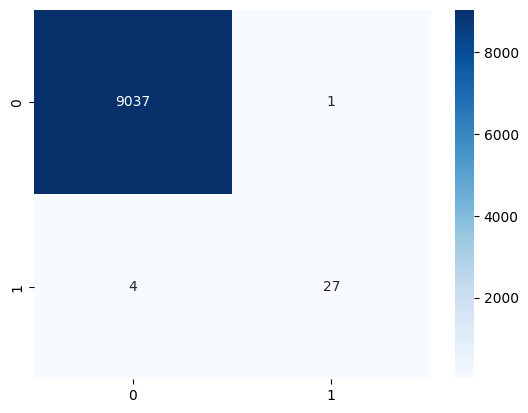

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

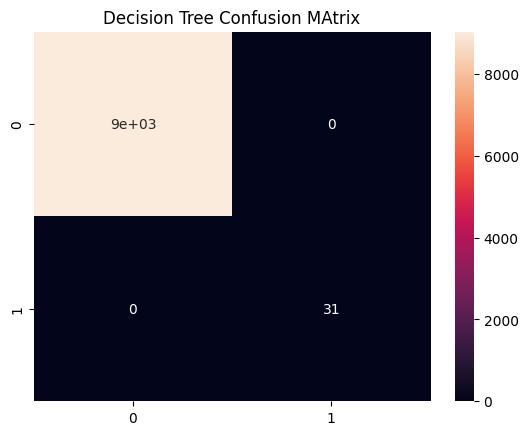

Precision:   [1. 1.]
Recall:      [1. 1.]
F1 Score:    [1. 1.]
Support:     [9038   31]
F2 Score:    1.0
Cross val score: [1. 1. 1. 1. 1.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


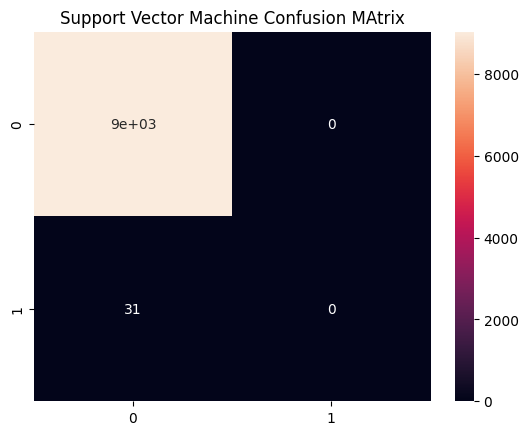

Precision:   [0.99658176 0.        ]
Recall:      [1. 0.]
F1 Score:    [0.99828795 0.        ]
Support:     [9038   31]
F2 Score:    0.995898583111448
Cross val score: [0.9965541 0.9965541 0.9965541 0.9965541 0.9965541]


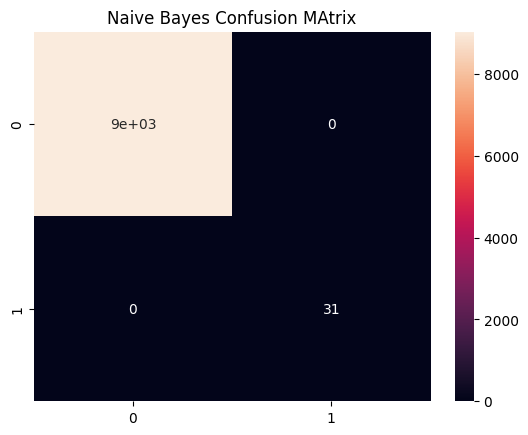

Precision:   [1. 1.]
Recall:      [1. 1.]
F1 Score:    [1. 1.]
Support:     [9038   31]
F2 Score:    1.0
Cross val score: [1. 1. 1. 1. 1.]


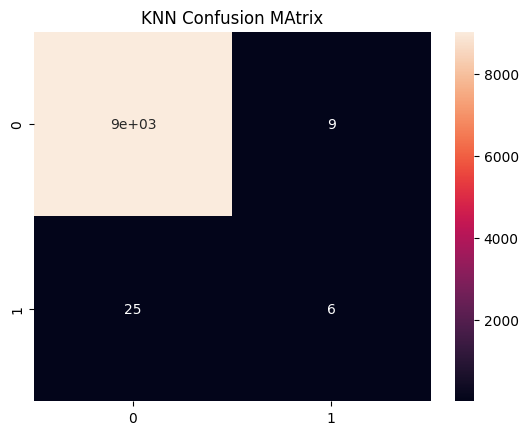

Precision:   [0.99723879 0.4       ]
Recall:      [0.9990042  0.19354839]
F1 Score:    [0.99812072 0.26086957]
Support:     [9038   31]
F2 Score:    0.9959747453404895
Cross val score: [0.99765679 0.99724328 0.99710544 0.99696761 0.99710544]


In [ ]:
models = {
    'Decision Tree':DecisionTreeClassifier(),
    'Support Vector Machine':SVC(),
    'Naive Bayes':GaussianNB(),
    'KNN':KNeighborsClassifier(n_neighbors=5)
}
model_names=models.keys()
f2_score=[]
kscore=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
    scores=cross_val_score(model,X,y,cv=5)
    kscore.append(scores.mean())


    sns.heatmap(cm,annot=True)
    plt.title(name+' Confusion MAtrix')
    plt.show()

    print(f'{"Precision:": <12} {precision}')
    print(f'{"Recall:": <12} {recall}')
    print(f'{"F1 Score:": <12} {f1_score}')
    print(f'{"Support:": <12} {support}')
    print(f'{"F2 Score:": <12} {f2}')
    print(f'{"Cross val score:": <12} {scores}')